# Föreläsning 6
I dagen föreläsning kommer vi att forsätta bekanta oss med konfidensintervall och komma in på den nära besläktade hypotesprövningen:

* Konfidensintervall:
    * Populationsandel
    * Stickprovsstorlek
    * Parvisa observationer
* Hypotestest:
    * Introduktion till hypotesprövning
    * Testfunktion
    * Signifikansnivå

# Konfidensintervall
### Populationsandel

När vi skattar en populationsandel $\theta$ med en stickprovsandel $\hat{\theta}$ så är det vanligt att vi vill veta hur stor skillnaden mellan $\theta$ och $\hat{\theta}$. Vi kan göra detta genom att beräkna ett konfidensintervall för $\theta$. Genom att kunna svara med ett intervall så kan vi återspegla hur säkra vi är i vår skattning av andelen.

I förra veckan såg vi hur vi kan beräkna konfidensintervall för medelvärdet. Vi kan använda samma princip för att beräkna konfidensintervall för andelen. Vi kan då skriva:

$$ I_\theta = \hat{\theta} \pm z_{\alpha/2} \sqrt{\frac{\hat{\theta}(1-\hat{\theta})}{n}}. $$

Där $z_{\alpha/2}$ är kvantilvärdet vid signifikans $\alpha /2$ och $\sqrt{\frac{\hat{\theta}(1-\hat{\theta})}{n}}$ är standardavvikelsen $s$ för andelen. 

Inom detta intervall väntar vi oss att andelen av populationen $\theta$ ligger. Vi kan då säga att vi är $(1-\alpha)$ säkra på att andelen ligger inom intervallet.

#### Exempel:

Vi har en $n=100$ datapunkter i ett stickprov och en stickprovsandel $\hat{\theta} = 0.6$. Vi vill beräkna ett konfidensintervall för andelen $\theta$ med signifikans $\alpha = 0.05$. Vi kan då skriva:

$$ I_\theta = 0.6 \pm z_{0.025} \sqrt{\frac{0.6(1-0.6)}{100}} = 0.6 \pm 1.96 \sqrt{\frac{0.24}{100}} = 0.6 \pm 0.096. $$

Därmed är vi 95% säkra på att andelen ligger mellan $0.504$ och $0.696$.



#### Exempel med iris:

Vi kan använda oss av iris-datan för att beräkna konfidensintervall för andelen blommor med foderbladslängd större än 5.5 cm. 


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ladda in data
df_iris = pd.read_csv('../data/iris.csv')
df_iris

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [14]:

# Beräkna andelen foderblad som är längre än 5.5 cm
length_threshold = 5.5
df_iris['longer_than_thresh'] = df_iris['sepallength'] > length_threshold
df_iris

,sepallength,sepalwidth,petallength,petalwidth,class,longer_than_thresh
0,5.1,3.5,1.4,0.2,Iris-setosa,False
1,4.9,3.0,1.4,0.2,Iris-setosa,False
2,4.7,3.2,1.3,0.2,Iris-setosa,False
3,4.6,3.1,1.5,0.2,Iris-setosa,False
4,5.0,3.6,1.4,0.2,Iris-setosa,False
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,True
146,6.3,2.5,5.0,1.9,Iris-virginica,True
147,6.5,3.0,5.2,2.0,Iris-virginica,True
148,6.2,3.4,5.4,2.3,Iris-virginica,True


Andelen foderblad som är längre än 5.5 cm är 0.61


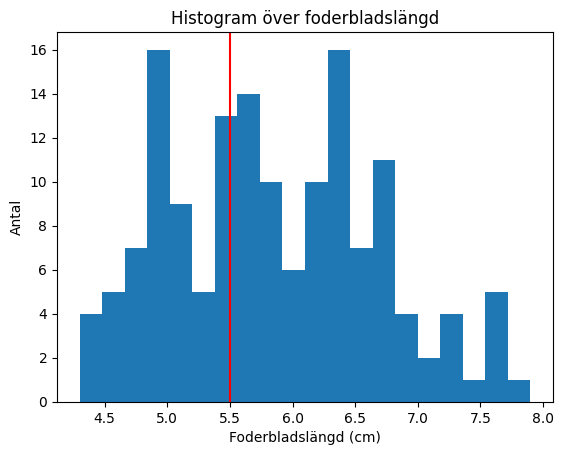

In [15]:

# Summera antalet blommor som är längre än 5.5 cm
longer_than = df_iris['longer_than_thresh'].sum()
n = len(df_iris)
propotion_longer_than = longer_than / n

# Skriv ut resultatet
print(f'Andelen foderblad som är längre än {length_threshold} cm är {propotion_longer_than:.2f}')

# Plotta histogram
plt.hist(df_iris['sepallength'], bins=20)
plt.axvline(x=length_threshold, color='red')
plt.xlabel('Foderbladslängd (cm)')
plt.ylabel('Antal')
plt.title('Histogram över foderbladslängd')
plt.show()


Beräkna konfidensintervall för andelen blommor med foderbladslängd större än 5.5 cm med signifikans $\alpha = 0.05$.

In [16]:
# Beräkna konfidensintervallet
import scipy.stats as stats
alpha = 0.05

# Tvåsidigt konfidensintervall
z = stats.norm.ppf(1 - alpha/2)
lower = propotion_longer_than - z * np.sqrt(propotion_longer_than * (1 - propotion_longer_than) / n)
upper = propotion_longer_than + z * np.sqrt(propotion_longer_than * (1 - propotion_longer_than) / n)

# Printa resultatet
print(f'Tvåsidigt konfidensintervall: [{lower:.2f}, {upper:.2f}]')

Tvåsidigt konfidensintervall: [0.53, 0.68]


### Stickprovsstorlek

När man utför undersökningar vill man vara så effektiv som möjligt med de medel som man har. Om vi känner till hur brett konfidensintervall vi kan acceptera så kan vi beräkna hur många datapunkter vi behöver för att få ett visst konfidensintervall. 

Bredden på ett konfidensintervall kan uppskattas som:

$$ I_\theta = 2 \cdot z_{\alpha/2} \cdot s. $$

vilket för populationsandel blir:

$$ I_\theta = 2 \cdot z_{\alpha/2} \cdot \sqrt{\frac{\hat{\theta}(1-\hat{\theta})}{n}}. $$

där $I_\theta$ är bredden på konfidensintervall, $z_{\alpha/2}$ är kvantilvärdet vid signifikans $\alpha /2$, $\hat{\theta}$ är stickprovsanden och $n$ är stickprovsstorleken.

Då kan vi lösa ut $n$:


$$ I_\theta\sqrt{n} = 2 \cdot z_{\alpha/2} \cdot \sqrt{\hat{\theta}(1-\hat{\theta})} $$
$$ \sqrt{n} = \frac{2 \cdot z_{\alpha/2}}{I_\theta} \cdot \sqrt{\hat{\theta}(1-\hat{\theta})} $$

$$ n = \frac{(2 \cdot z_{\alpha/2})^2 \cdot \hat{\theta}(1-\hat{\theta})}{I_\theta^2}. $$

### Exempel:

Vi vill utföra en undersökning där vi vill veta andelen av befolkningen som är för eller emot en viss fråga. Vi vill ha ett konfidensintervall på $0.1$ med signifikans $\alpha = 0.05$. Vi vet att andelen är $0.6$ i populationen. Hur många datapunkter behöver vi då för att få ett sådant konfidensintervall?

In [17]:
import scipy.stats as stats

# Calculate number of samples needed to achieve a certain accuracy in confidence interval
I_theta = 0.1
alpha = 0.05
p = 0.6

n = (stats.norm.ppf(1 - alpha / 2) * np.sqrt(p * (1 - p)) * 2 / I_theta) ** 2

print(f'Number of samples needed: {n}')

Number of samples needed: 368.78004678663586


#### Testar på riktig data:

Confidence interval: (0.5683085763032498, 0.6674637814203275)
Confidence interval width: 0.09915520511707765


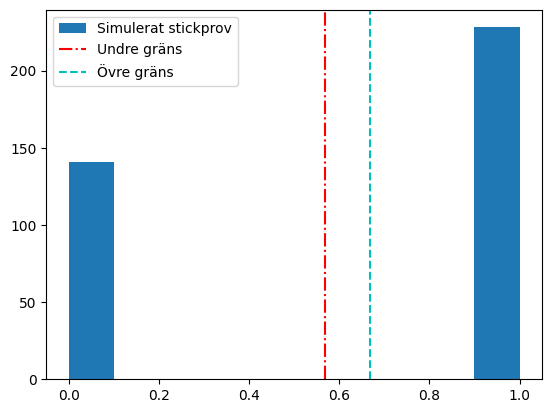

In [18]:
# Simulate population proportions and calculate confidence intervals
n = 369
p = 0.6
alpha = 0.05

# Simulate population proportions
pop = stats.bernoulli.rvs(p, size=n)

# Calculate confidence intervals
conf_int = stats.norm.interval(1 - alpha, loc=np.mean(pop), scale=np.std(pop) / np.sqrt(n))

# Bredd på intervallet
conf_width = conf_int[1] - conf_int[0]

print(f'Confidence interval: {conf_int}')
print(f'Confidence interval width: {conf_width}')

# Plot population proportions and confidence intervals
import matplotlib.pyplot as plt

plt.figure()
plt.hist(pop, label='Simulerat stickprov')
plt.axvline(conf_int[0], color='r', linestyle='-.', label='Undre gräns')
plt.axvline(conf_int[1], color='c', linestyle='--', label='Övre gräns')
plt.legend()
plt.show()

### Parvisa observationer

När vi har stickprov från två olika populationer förutsätter vi att de är oberoende. En annan vanlig situation är att vi har två stickprov från samma population med återkommande individer. I sådana fall kan vi använda oss av parvisa observationer.

Detta kan vara ett effektivt sätt att mäta påverkan av en behandling. Om vi har två stickprov från samma population där vi har mätt en variabel innan och efter en behandling så kan vi använda oss av parvisa observationer för att se om behandlingen har haft någon effekt.

Detta förenklar beräkningarna då vi bara behöver titta på differensen för varje individ. 


#### Exempel parvisa observationer:

Låt oss fortsätta använda `iris`-datan. Vi vill nu undersöka om behandlingen med en viss typ av växtmedel har haft någon effekt på foderbladslängden. Vi har två stickprov från samma population där vi har mätt foderbladslängden innan och efter behandlingen. Vi kan då använda oss av parvisa observationer för att se om behandlingen har haft någon effekt.

I detta exempel antar vi de första 25 datapunkterna av `iris-setosa` är innan behandlingen och de sista 25 datapunkterna är efter behandlingen. 

In [19]:
# Dela upp iris setosa i två grupper
nbr_samples = 25
df_setosa = df_iris[df_iris['class'] == 'Iris-setosa']
df_setosa_before = df_setosa.iloc[:nbr_samples]
df_setosa_after = df_setosa.iloc[nbr_samples:]

# Beräkna differensen av foderbladslängderna
diff = df_setosa_after['sepallength'].values - df_setosa_before['sepallength']

print(f'Differensen av iris setosa foderbladslängderna är:\n{diff}')

Differensen av iris setosa foderbladslängderna är:
0    -0.1
1     0.1
2     0.5
3     0.6
4    -0.3
5    -0.6
6     0.8
7     0.2
8     1.1
9     0.0
10   -0.4
11    0.7
12    0.1
13    0.1
14   -0.7
15   -0.7
16   -0.9
17   -0.7
18   -0.7
19    0.0
20   -0.6
21    0.0
22    0.0
23    0.2
24    0.2
Name: sepallength, dtype: float64


In [20]:
diff.describe()

count    25.000000
mean     -0.044000
std       0.532353
min      -0.900000
25%      -0.600000
50%       0.000000
75%       0.200000
max       1.100000
Name: sepallength, dtype: float64

Beräkna konfidensintervall för skillnaden i foderbladslängd mellan innan och efter behandlingen med signifikans $\alpha = 0.05$.

Tvåsidigt konfidensintervall för medelvärdet: [-0.25, 0.16]


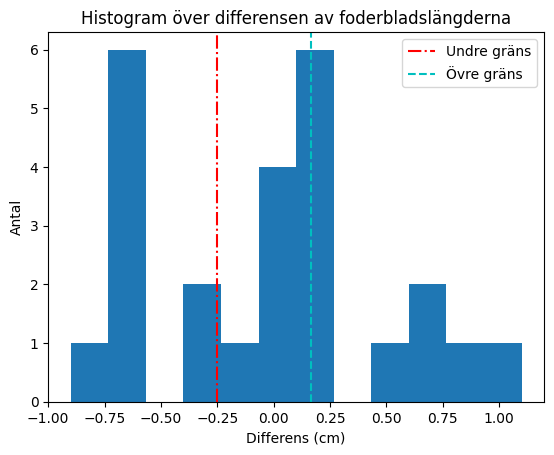

In [21]:
# Beräkna konfidensintervallet
alpha = 0.05
n = len(diff)
mean = np.mean(diff)
std = np.std(diff, ddof=1)

# Tvåsidigt konfidensintervall
z = stats.norm.ppf(1 - alpha/2)
lower = mean - z * std / np.sqrt(n)
upper = mean + z * std / np.sqrt(n)

# Printa resultatet
print(f'Tvåsidigt konfidensintervall för medelvärdet: [{lower:.2f}, {upper:.2f}]')

# Plotta histogram
plt.hist(diff, bins=12)
plt.axvline(x=lower, color='red', linestyle='-.')
plt.axvline(x=upper, color='c', linestyle='--')
plt.title('Histogram över differensen av foderbladslängderna')
plt.xlabel('Differens (cm)')
plt.ylabel('Antal')
plt.legend(['Undre gräns', 'Övre gräns'])
plt.show()



#### Slutsats:
Då vi har ett konfidensintervall som innehåller noll $(-0.25, 0.16)$ så kan vi konstatera att behandlingen inte haft en effekt på foderbladslängden. 

Vi får fortsätta leta efter en bättre behandling!

# Hypotesprövning
### Introduktion till hypotesprövning

Nu har vi sett att man kan uttrycka den osäkerhet man har från en skattning i form av ett konfidensintervall. Med samma princip kan vi uttrycka osäkerheten i en hypotes. Vår hyptes uttrycker vi som:

$$ H_0: \theta = \theta_0 $$
$$ H_1: \theta \neq \theta_0 $$
$$ \alpha = 0.05 $$

Där $\theta_0$ är ett värde vi har valt ut som vi vill testa om det är sant. $\alpha$ är signifikansnivån och är en gräns för hur stor osäkerhet vi är beredd att acceptera. Denna gräns är vanligtvis satt till 5% vilket motsvarar en konfidensgrad på 95%.

Vår nollhypotes $H_0$ är antagandet att t.ex. ingen skillnad skett. Om vi inte kan avvisa $H_0$ så kan vi inte säga att det skett någon förändring. Men om vi kan avvisa $H_0$ så kan vi säga att det skett en förändring. Vi kan då säga att $H_1$ som är mothypotesen är "sann".


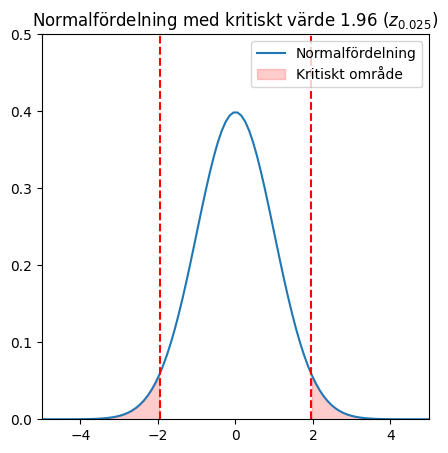

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Show a normal distribution with a critical value of 1.96
x = np.linspace(-5, 5, 100)
y = stats.norm.pdf(x, 0, 1)
plt.figure(figsize=(5, 5))
plt.plot(x, y, label='Normalfördelning')
plt.axvline(x=1.96, color='r', linestyle='--')
plt.axvline(x=-1.96, color='r', linestyle='--')
plt.fill_between(x, y, where=(x > 1.96), color='r', alpha=0.2, label='Kritiskt område')
plt.fill_between(x, y, where=(x < -1.96), color='r', alpha=0.2)
plt.title(r'Normalfördelning med kritiskt värde 1.96 $(z_{0.025})$')
plt.xlim(-5, 5)
plt.ylim(0, 0.5)
plt.legend(loc='upper right')
plt.show()


### Testfunktionen

Testfunktionen är ett värde som vi kan använda för att avgöra om vi kan förkasta $H_0$ eller inte. Testfunktionen är jämförs med det _kritiska värdet_ $z_{\alpha}$ för att avgöra om vi kan förkasta $H_0$ eller inte.

Testfunktionen kan beskrivas som:

$$ z = \frac{\text{punktskattning - nollhypotes}}{\text{standardavvikelse}} = \frac{\hat{\theta} - \theta_0}{s}. $$

Vi blir alltså behöver vi veta standardavvikelsen $s$ för att kunna beräkna testfunktionen.

Det kritiska värdet som vi jämför testfunktionen med är beror på vilken underliggande fördelning vi använder och vilken signifikansnivå vi har valt. T.ex. om vi använder en normalfördelning med signifikansnivån $\alpha = 0.05$ så är kritiska värdet $z_{\alpha/2} = 1.96$ (i det tvåsidiga fallet).

#### Exempel

Vi har en stickprovsandel $\hat{\theta} = 0.6$ som vi beräknat från $n=100$ datapunkter och vi vill testa om andelen är större än 0.5 vid signifikansnivå $\alpha = 0.05$. 
Vi ställer upp följande hypoteser:

$$ H_0: \theta = 0.5 $$
$$ H_1: \theta > 0.5 $$
$$ \alpha = 0.05 $$

Vi kan då beräkna testfunktionen $z$ som:

$$ 
\begin{align*}
z &= \frac{\hat{\theta} - \theta_0}{\sqrt{\frac{\hat{\theta}(1-\hat{\theta})}{n}}} \\
  &=\frac{0.6 - 0.5}{\sqrt{\frac{0.6(1-0.6)}{100}}} \\
  &=\frac{0.1}{\frac{\sqrt{0.24}}{10}} \\
  &=\frac{1}{\sqrt{0.24}} \\
  &= 2.04
\end{align*}
$$

In [23]:
print(f'z = {1 / 0.24**0.5}')

z = 2.041241452319315




Vi antar att $z$ följer en standardnormalfördelning. Då kan vi förkasta $H_0$ om $z > z_{\alpha}$. I vårt fall är $z_{\alpha} = 1.645$. 

$$ z > z_{\alpha} \Rightarrow 2.04 > 1.645 \Rightarrow \text{Förkasta } H_0. $$

Då vi kan förkasta $H_0$ kan vi säga att andelen är större än 0.5.


### Exempel på iris

Vi ska nu testa om medelvärdet för längden på blommornas foderblad är större än 5.7 cm. Vi använder oss av iris-datan.

Vi ställer upp följande hypoteser:

$$ H_0: \mu = 5.7 $$
$$ H_1: \mu > 5.7 $$
$$ \alpha = 0.05 $$

Vi kan då beräkna testfunktionen $z$ som:

$$
z = \frac{\hat{\mu} - \mu_0}{\sqrt{\frac{s^2}{n}}}
$$
<!-- $$
\begin{align}
z &= \frac{\hat{\mu} - \mu_0}{\sqrt{\frac{s^2}{n}}} \\
  &= \frac{5.843333 - 5.0}{\sqrt{\frac{0.681122}{150}}} \\
  &= 5.84
\end{align}
$$ -->


In [24]:
# Ladda in iris data
df_iris = pd.read_csv('../data/iris.csv')

# Hypotes
# H0: μ = 5.0
# H1: μ > 5.0
H0 = 5.7
alpha = 0.05

# Plocka ut längden på alla foderblad (sepal length)
sepal_length = df_iris['sepallength']

# Beräkna medelvärde och standardavvikelse
mean = np.mean(sepal_length)
std = np.std(sepal_length)

# Beräkna testfunktionens värde
n = len(sepal_length)
z = (mean - H0) / (std / np.sqrt(n))

print(f'testfunktionens värde: {z}')

testfunktionens värde: 2.1270627666140047


Vi gör antagander att $z$ följer en standardnormalfördelning. Då vi också har ett ensidigt intervall så är kritiska värdet $z_{\alpha} = 1.645$.

$$ z > z_{\alpha} \Rightarrow 2.127 > 1.645 \Rightarrow \text{Förkasta } H_0. $$

Då vi kan förkasta $H_0$ kan vi säga att medelvärdet för längden på blommorna är större än 5.7 cm.